<a href="https://colab.research.google.com/github/saurabhshinkar/BRS/blob/main/Book_Recommendation_System_Saurabh_Shinkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Book Recommendation System**

### <b> Problem Description </b>
###During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
###Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Data Description </b>

The Book-Crossing dataset comprises 3 files.

### <b>Users: </b>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

### <b>Books: </b> 
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium large. These URLs point to the Amazon website.

### <b>Ratings: </b> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.




# **Importing** **Libraries**

In [191]:
#Import all library that will be used in entire project
!pip install scikit-surprise
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
 
import ast
 
from sklearn.metrics.pairwise import cosine_similarity
 
import seaborn as sns
 
import numpy as np
 
import matplotlib.pyplot as plt
 
from sklearn.neighbors import NearestNeighbors
 
from scipy.sparse import csr_matrix
 
from surprise import Reader, Dataset
 
from surprise.model_selection import train_test_split
 
from surprise import SVDpp, accuracy
 
from surprise.model_selection import cross_validate
 
from collections import defaultdict
 
from surprise import SVD, SVDpp, NMF
 
from surprise import SlopeOne, CoClustering
 
import matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Mount Drive And Import Data**

In [192]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
#Importing users data
File_path='/content/drive/MyDrive/Capstone Projects/Book Recommendation System/'
users= pd.read_csv(File_path + 'Users.csv')

#Importing books data
books= pd.read_csv(File_path + 'Books.csv')

#Importing ratings data
ratings= pd.read_csv(File_path + 'Ratings.csv')

In [194]:
# First Look 
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [195]:
# First Look 
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [196]:
# First Look 
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [197]:
#data information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [198]:
#data information
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [199]:
#data information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# **Handling Missing Vaules**

**Users Dataset**

In [200]:
# Missing Value Count Function
def show_missing():
    missing = users.columns[users.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(users[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(users[show_missing()].isnull().sum().sort_values(ascending = False)/len(users)*100,2))

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [201]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

minimum age 0 and max age 244? so outliers exist in age

Age is positively skewed.
Median imputation is preferable for skewed distribution(be it right or left). 
So we will replace nulls with median in Age column. Outliers affect the mean value of the data but have little effect on the median or mode of a given set of data so we can impute nulls with median before removing outliers.

In [202]:
#Fill NaN Values in Age Column with Median
users['Age'] =users['Age'].fillna(users['Age'].median())

In [203]:
#Capping the outlier rows with Percentiles
upper_lim = users['Age'].quantile(.95)
lower_lim = users['Age'].quantile(.05)
users.loc[(users["Age"] > upper_lim),"Age"] = upper_lim
users.loc[(users["Age"] < lower_lim),"Age"] = lower_lim

In [204]:
upper_lim

56.0

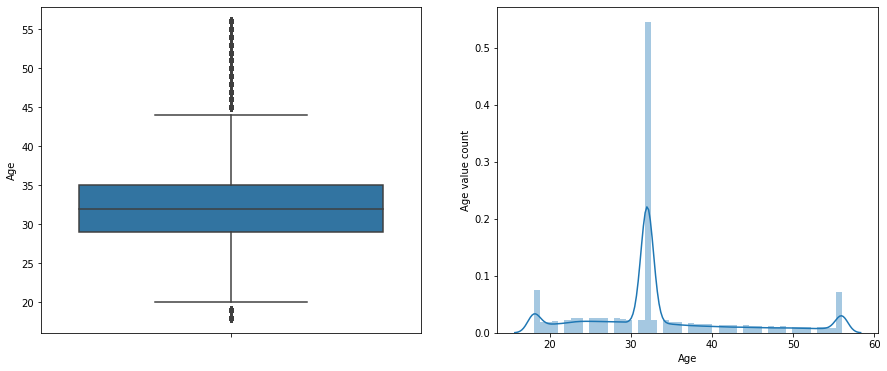

In [205]:
#Boxplot and distplot of Age
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=users["Age"])
fig.set_title('')
fig.set_ylabel("Age")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(users["Age"].dropna())
fig.set_ylabel('Age value count')
fig.set_xlabel("Age")

plt.show()

In [206]:
users['Age'].describe()

count    278858.000000
mean         33.402570
std           9.523058
min          18.000000
25%          29.000000
50%          32.000000
75%          35.000000
max          56.000000
Name: Age, dtype: float64

In [207]:
users['locat']=users.Location.apply(lambda x: x.split(', '))
users['Country']=users.locat.apply(lambda x: x[2] if len(x)==3 else 'n/a')
users.drop('locat',axis=1,inplace=True)

**Books Dataset**

In [208]:
# Missing Value Count Function
def show_missing():
    missing = books.columns[books.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(books[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(books[show_missing()].isnull().sum().sort_values(ascending = False)/len(books)*100,2))

Missing Data Count
Image-URL-L    3
Publisher      2
Book-Author    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Publisher      0.0
Book-Author    0.0
dtype: float64


In [209]:
#Dropping Nulls of Books data as they are negligible
books.dropna(inplace=True)

In [210]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, ..., '1376', '1926', '2037'], dtype=object)

In [211]:
#converting Reviews type into integer
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

In [212]:
#Capping the outlier rows with Percentiles
upper_lim = books['Year-Of-Publication'].quantile(.95)
lower_lim = books['Year-Of-Publication'].quantile(.05)
books.loc[(books["Year-Of-Publication"] > upper_lim),"Year-Of-Publication"] = upper_lim
books.loc[(books["Year-Of-Publication"] < lower_lim),"Year-Of-Publication"] = lower_lim

In [213]:
upper_lim

2003.0

In [214]:
lower_lim

1976.0

**Ratings Dataset**

In [215]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


# **Cleaning Data**

In [216]:
users.head(1)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa


In [217]:
users.shape

(278858, 4)

In [218]:
ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [219]:
ratings.shape

(1149780, 3)

Merging users and ratings dataset on User-ID column

In [220]:
#Merging both data 
data_users_ratings=pd.merge(users,ratings, on='User-ID')

Merging combined data of users and ratings with books data on ISBN column

In [221]:
#Merging both data
merged=pd.merge(books,data_users_ratings, on='ISBN')

In [222]:
#info
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1031128
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031129 non-null  object 
 1   Book-Title           1031129 non-null  object 
 2   Book-Author          1031129 non-null  object 
 3   Year-Of-Publication  1031129 non-null  int64  
 4   Publisher            1031129 non-null  object 
 5   Image-URL-S          1031129 non-null  object 
 6   Image-URL-M          1031129 non-null  object 
 7   Image-URL-L          1031129 non-null  object 
 8   User-ID              1031129 non-null  int64  
 9   Location             1031129 non-null  object 
 10  Age                  1031129 non-null  float64
 11  Country              1031129 non-null  object 
 12  Book-Rating          1031129 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 110.1+ MB


In [223]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [224]:
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",32.0,canada,0


In [225]:
merged.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

In [226]:
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,canada,0


In [227]:
np.set_printoptions(threshold=10)

In [228]:
merged.ISBN.unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

In [229]:
merged['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [230]:
merged['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

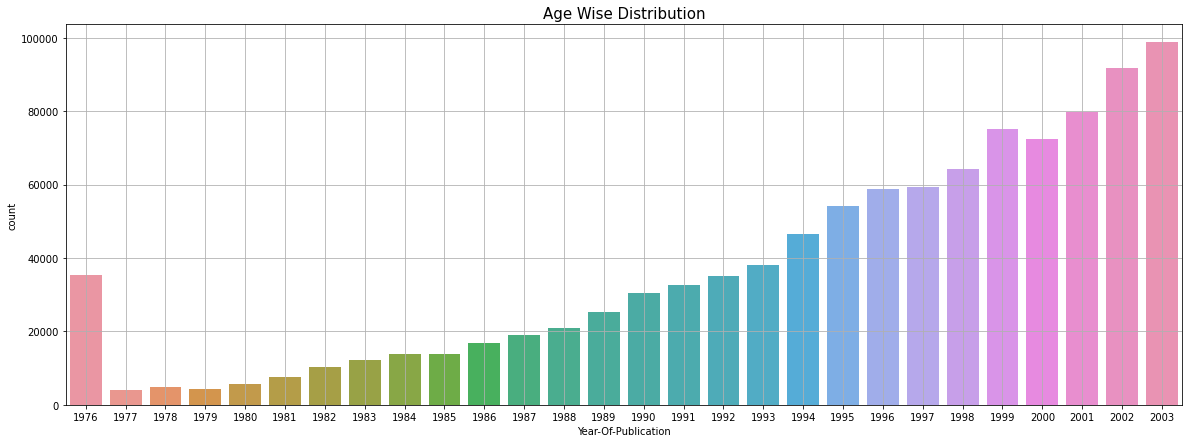

In [231]:
#barplot of age and its counts 
plt.figure(figsize=(20,7))
sns.countplot(x = merged['Year-Of-Publication'])
plt.title('Age Wise Distribution',fontsize=15)
plt.grid()
plt.show()

In [232]:
merged['Year-Of-Publication'].unique()

array([2002, 2001, 1991, ..., 1989, 1984, 1977])

In [233]:
merged['Year-Of-Publication'].unique()

array([2002, 2001, 1991, ..., 1989, 1984, 1977])

In [234]:
#pd.set_option('display.max_rows', 50000)

In [235]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


In [236]:
merged.Country.value_counts()

usa                                  745812
canada                                92954
n/a                                   37573
united kingdom                        32007
germany                               27654
                                      ...  
hungary"                                  1
c                                         1
samoa                                     1
zambia                                    1
usa (currently living in england)         1
Name: Country, Length: 281, dtype: int64

Duplicates

In [237]:
merged.duplicated().any()

False

##**EDA**

In [238]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


In [239]:
#Top 10 Books by mean rating
Books_by_mean_rating=merged.groupby('Book-Title')['Book-Rating'].median().reset_index(name="Median Rating").sort_values(by=['Median Rating'], ascending =False)
Books_by_mean_rating.head(50)

,Book-Title,Median Rating
39864,Corto Maltese : La Ballade de la mer salÃ?Â©e,10.0
114327,Madita. ( Ab 8 J.).,10.0
198823,The Mushroom Book: Recipes for Earthly Delights,10.0
62488,Evilution,10.0
198841,The Music of Black Americans: A History,10.0
21203,Becoming a Critical Thinker: A User Friendly M...,10.0
114280,"Made in Goatswood (Call of Cthulhu, No 8)",10.0
198861,The Mustard Seed: Discourses on the Sayings of...,10.0
21195,Becoming Visible : An Illustrated History of L...,10.0
198867,The Mute Stones Speak: The Story of Archaeolog...,10.0


Top 10 sold books

In [240]:
Top10_Book=merged['Book-Title'].value_counts().reset_index().head(10)
Top10_Book.rename(columns={'index':'Book-Title','Book-Title':'Count'},inplace=True)
Top10_Book

,Book-Title,Count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828
5,Bridget Jones's Diary,815
6,The Secret Life of Bees,774
7,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
8,The Red Tent (Bestselling Backlist),723
9,Angels &amp; Demons,670


books with same title but different author

In [241]:
books['Book-Title'].value_counts()

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
Dracula                                                                                                                           20
The Secret Garden                                                                                                                 20
                                                                                                                                  ..
On a Clear Day You Can See General Motors: John Z. De Lorean's Look Inside the Automotive Giant                                    1
What Every Kid Should Know                                           

In [242]:
books[books['Book-Title']=='Selected Poems']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39416,0811201465,Selected Poems,K. Patchen,1976,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41316,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106885,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118775,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...
127462,0520012984,Selected Poems,Paul Verlaine,1976,University of California Press,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...
156894,0871401541,Selected Poems,E. E. Cummings,1994,Liveright Publishing Corporation,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...
158312,0060909897,Selected Poems,Gwendolyn Brooks,1976,Harpercollins,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...
175602,0571050190,Selected Poems,T. T Gunn,1976,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...
183908,1550651498,Selected Poems,Ralph Gustafson,2001,Vehicule Press,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...


In [243]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


Top 10 author

In [244]:
Top10_author=books['Book-Author'].value_counts().reset_index().head(10)
Top10_author.rename(columns={'index':'Book-Author','Book-Author':'Count'},inplace=True)
Top10_author

,Book-Author,Count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
5,Francine Pascal,372
6,Isaac Asimov,330
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


In [245]:
Top10_Year=merged['Year-Of-Publication'].value_counts().reset_index().head(10)
Top10_Year.rename(columns={'index':'Year-Of-Publication','Year-Of-Publication':'Count'},inplace=True)
Top10_Year

,Year-Of-Publication,Count
0,2003,98714
1,2002,91799
2,2001,79800
3,1999,75194
4,2000,72326
5,1998,64208
6,1997,59357
7,1996,58825
8,1995,54090
9,1994,46444


In [246]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


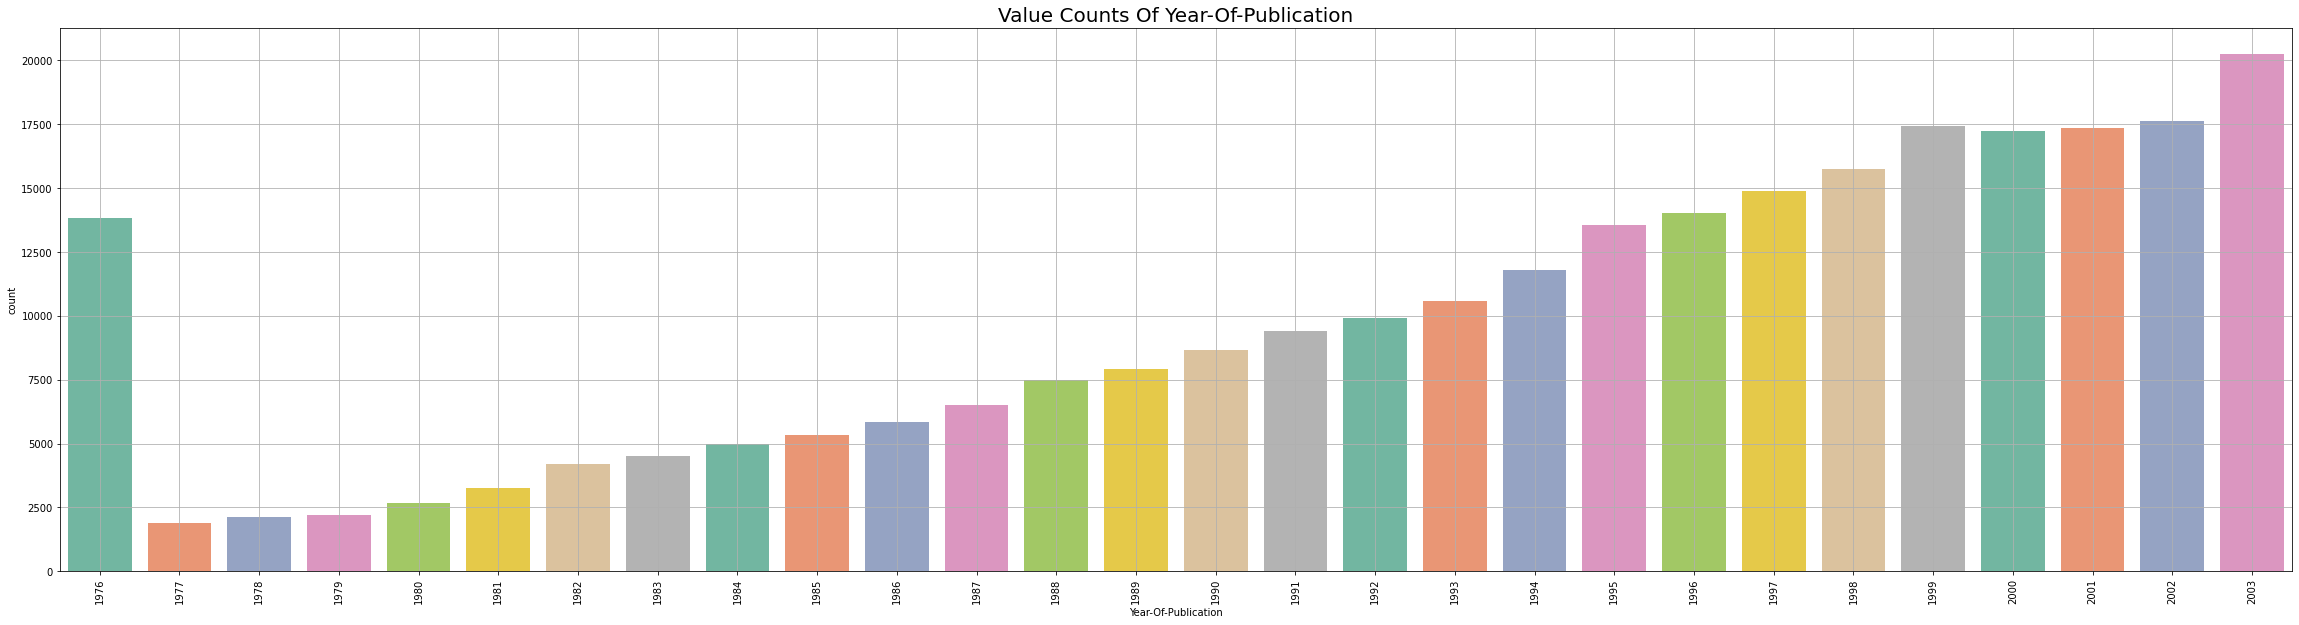

In [247]:
#Value Counts Of Year-Of-Publication
plt.rcParams['figure.figsize'] = (40,10)
fig = sns.countplot(x=books['Year-Of-Publication'],palette="Set2")
plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()

plt.title("Value Counts Of Year-Of-Publication",fontsize=20)

plt.show()

Top 10 publisher

In [248]:
Top10_Country=merged['Country'].value_counts().reset_index().head(10)
Top10_Country.rename(columns={'index':'Country','Country':'Count'},inplace=True)
Top10_Country

,Country,Count
0,usa,745812
1,canada,92954
2,n/a,37573
3,united kingdom,32007
4,germany,27654
5,australia,18217
6,spain,14773
7,france,10631
8,portugal,6975
9,new zealand,5556


Text(0.5, 1.0, 'Distribution Plot Of Age')

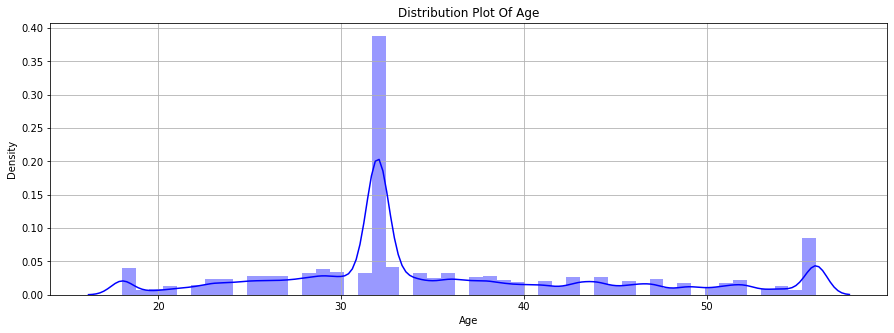

In [249]:
#Distribution Plot Of Age
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(merged['Age'],color="blue")
plt.grid()
plt.title('Distribution Plot Of Age')

In [250]:
ratings['Book-Rating'] != 0

0          False
1           True
2          False
3           True
4           True
           ...  
1149775     True
1149776    False
1149777     True
1149778     True
1149779     True
Name: Book-Rating, Length: 1149780, dtype: bool

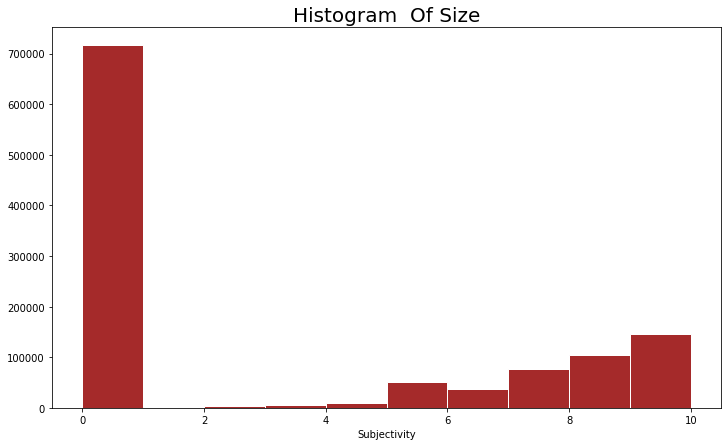

In [251]:
#Histogram Of Book-Rating
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Histogram  Of Size",fontsize=20)
plt.hist(ratings['Book-Rating'],color="brown",edgecolor="white")
plt.show()

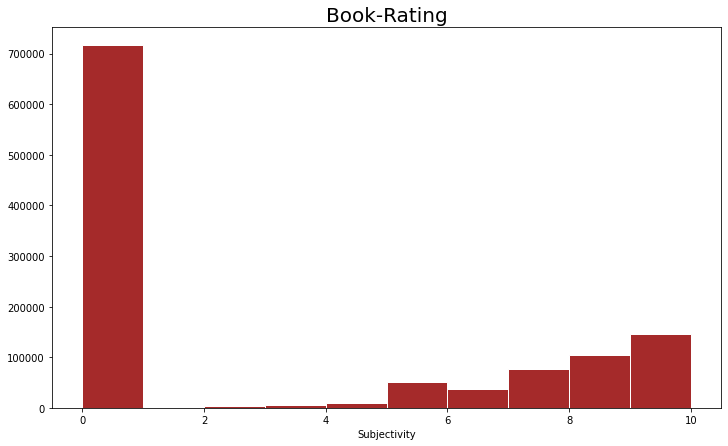

In [252]:
#Histogram Of Book-Rating
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Book-Rating",fontsize=20)
plt.hist(ratings['Book-Rating'],color="brown",edgecolor="white")
plt.show()

# Collaborative filtering models Used


###**Data Preparation**

In [253]:
#Rating head
ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [254]:
#Rating data with exclusion of Books with rating 0
ratings= ratings[ratings['Book-Rating'] != 0]

In [255]:
#Merging dataframe rating and books on ISBN
df=pd.merge(ratings,books, on='ISBN')

###**Implementing KNN**

**Books which are rated by atleast 10 users**

In [256]:
# Books interactionn count
books_interactions_count_df = df.groupby(['ISBN', 'User-ID']).size().groupby('ISBN').size()
print('# of books: %d' % len(books_interactions_count_df))

# Books with enough interactions
books_with_enough_interactions_df = books_interactions_count_df[books_interactions_count_df >= 10].reset_index()[['ISBN']]
print('# of books with at least 10 interactions: %d' % len(books_with_enough_interactions_df))
print(books_with_enough_interactions_df.head(5))

# of books: 149832
# of books with at least 10 interactions: 5444
         ISBN
0  0002558122
1  000648302X
2  000649840X
3  0006547834
4  0006550576


**Users which have rated atleast 25 different books**

In [257]:
# Users interactionn count
users_interactions_count_df = df.groupby(['User-ID', 'ISBN']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

# Users with enough interactions
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 25].reset_index()[['User-ID']]
print('# of users with at least 25 interactions: %d' % len(users_with_enough_interactions_df))
print(users_with_enough_interactions_df.head(5))

# of users: 68091
# of users with at least 25 interactions: 2604
   User-ID
0      254
1      507
2      638
3      643
4      651


In [258]:
#Users with enough interactions
print('# of interactions: %d' % len(df))
interactions_from_selected_users_df = df.merge(users_with_enough_interactions_df, 
               how = 'right',
               on = 'User-ID')
print('# of interactions from users with at least 25 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383838
# of interactions from users with at least 25 interactions: 202455


**Dataframe of Users and Books with enough interactions**

In [259]:
#Users and Books with enough interactions
print('# of interactions: %d' % len(df))
interactions_from_selected_books_and_users_df= interactions_from_selected_users_df.merge(books_with_enough_interactions_df, on = 'ISBN')
print('# of interactions from users with at least 25 interactions and books with at least 10 interactions: %d' % len(interactions_from_selected_books_and_users_df))


# of interactions: 383838
# of interactions from users with at least 25 interactions and books with at least 10 interactions: 63541


In [260]:
#interactions from selected books and users dataframe
interactions_from_selected_books_and_users_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,254,0671021001,7,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...
1,2977,0671021001,9,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...
2,6563,0671021001,2,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...
3,8253,0671021001,10,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...
4,11718,0671021001,8,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...


In [261]:
#Shape of interactions from selected books and users dataframe
interactions_from_selected_books_and_users_df.shape

(63541, 10)

In [262]:
#aggregating all the interactions of users and applying log transformation to rating
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df1 = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'Book-Title'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df1))
interactions_full_df = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(5)

# of unique user/item interactions: 63228
# of unique user/item interactions: 63541


,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928
1,254,0064471047,3.000000
2,254,0066238501,2.584963
3,254,0142001740,3.321928
4,254,0380730448,3.169925


In [266]:
#Creating a sparse pivot table
df_user_item_matrix = interactions_full_df.pivot(index='ISBN',columns='User-ID',values='Book-Rating').fillna(0)
user_item_matrix_sparse = csr_matrix(df_user_item_matrix.values)
df_user_item_matrix1 = interactions_full_df1.pivot(index='User-ID',columns='Book-Title',values='Book-Rating').fillna(0)
df_user_item_matrix1=df_user_item_matrix1.transpose()
user_item_matrix_sparse1 = csr_matrix(df_user_item_matrix1.values)
user_item_matrix_sparse1=csr_matrix(df_user_item_matrix1.values)

**Model Building**

In [267]:
#Fitting Model
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)
 
model.fit(user_item_matrix_sparse1)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

**Recommendations for randomly selected book**

In [268]:
#Recommendations for randomly selected book
query_index = np.random.choice(df_user_item_matrix1.shape[0])
distances, indices = model.kneighbors(df_user_item_matrix1.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 16)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Book {0}:\n'.format(df_user_item_matrix1.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_user_item_matrix1.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Book Daisy Fay and the Miracle Man:

1: Welcome to the World, Baby Girl! : A Novel, with distance of 0.7638519792322442:
2: Quite a Year for Plums: A Novel, with distance of 0.7853042212054301:
3: Straight Man, with distance of 0.7915142817208456:
4: Blood Shot (V.I. Warshawski Novels (Paperback)), with distance of 0.8036324117587605:
5: The Sheltering Sky (Vintage International), with distance of 0.8099660804726638:
6: Deenie, with distance of 0.8099808271126541:
7: Burn Marks (V.I. Warshawski Novels (Paperback)), with distance of 0.8195694161235756:
8: Killing Mr. Griffin (Laurel Leaf Books), with distance of 0.8246642892835125:
9: The Experiment, with distance of 0.8367601118135853:
10: Martin Dressler : The Tale of an American Dreamer (Vintage Contemporaries), with distance of 0.844077900127892:
11: Red, White and Blue : A Novel, with distance of 0.8458634324816616:
12: The Legacy of Luna: The Story of a Tree, a Woman and the Struggle to Save the Redwoods, with 

**Model building and recommendation for perticular book**

In [269]:
#Model building and recommendation for perticular book
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)
 
model.fit(user_item_matrix_sparse)

index_to_book = dict()
 
df_titles_book = df.set_index('ISBN').loc[df_user_item_matrix.index]
 
count = 0
 
for index, row in df_titles_book.iterrows():
 
    index_to_book[count]=row['Book-Title']
 
    count +=1
 
 
def recommender(model, user_item_matrix_sparse, df_book, number_of_recommendations, book_index):
 
    main_title = index_to_book[book_index]
 
    dist, ind = model.kneighbors(user_item_matrix_sparse[book_index], n_neighbors=number_of_recommendations+1)
 
    dist = dist[0].tolist()
 
    ind = ind[0].tolist()
 
    titles = []
 
    for index in ind:
 
        titles.append(index_to_book[index])
 
    recommendations = list(zip(titles,dist))    
 
    # sort recommendations

    recommendations_sorted = sorted(recommendations, key = lambda x:x[1])
 
    # reverse recommendations, leaving out the first element 
 
    recommendations_sorted.reverse()
 
    recommendations_sorted = recommendations_sorted[:-1]
 
    print("Recommendations for Book {}: ".format(main_title))
 
    count = 0
 
    for (title, distance) in recommendations_sorted:
 
        count += 1
 
        print('{}. {}, recommendation score = {}'.format(count, title, round(distance,5)))
 
recommender(model, user_item_matrix_sparse, df, 10, 10)

Recommendations for Book Before and After: 
1. Tishomingo Blues, recommendation score = 0.81735
2. Waiting : The True Confessions of a Waitress, recommendation score = 0.81501
3. Soul Mountain, recommendation score = 0.80676
4. Perfect Murder, Perfect Town, recommendation score = 0.80452
5. Politically Correct Holiday Stories: For an Enlightened Yuletide Season, recommendation score = 0.80446
6. A Promising Man (and About Time, Too), recommendation score = 0.8012
7. When He Was Wicked (Bridgerton Family Series), recommendation score = 0.80114
8. All-American Girl, recommendation score = 0.79553
9. Night Watch, recommendation score = 0.79382
10. A Cook's Tour : Global Adventures in Extreme Cuisines, recommendation score = 0.77895


Explicit Feedback Recommender Systems
These are systems where the user gives explicit feedback, usually in the form of a numeric rating for each recommendation.

Metrics used in Explicit Recommender Systems
For such a system, the metrics used could be pretty simular to that used in a standard regression problem since the target is really a score that you could be predicting, and the actual score is available to measure how good the prediction is.

Mean Absolute Error: Mean over all data points, absolute value of difference between actual rating and predicted rating.
Root Mean Square Error: Square root of Mean over all data points, square of difference between the actual rating and predicted rating.

##**SVD**

In [272]:
reader = Reader(rating_scale=(minimum_rating,maximum_rating))
 
data = Dataset.load_from_df(interactions_full_df[['User-ID', 'ISBN', 'Book-Rating']], reader) 

In [271]:
minimum_rating = min(interactions_full_df['Book-Rating'].values)
 
maximum_rating = max(interactions_full_df['Book-Rating'].values)



###**Train Test Split And Model Building**

In [276]:
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split

In [277]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# Then compute MAE
accuracy.mae(predictions)

RMSE: 0.3126
MAE:  0.2218


0.22177203397511197

In [278]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928


In [279]:
user_id = '254'

isbn = '0060934700'

prediction = algo.predict(uid=user_id, iid=isbn)

print("Predicted rating of user with id {} for movie with id {}: {}".format(user_id, isbn, round(prediction.est,3)))

Predicted rating of user with id 254 for movie with id 0060934700: 3.128


In [280]:
# Predictions- actual and estimated
predictions

[Prediction(uid=95316, iid='0316693006', r_ui=3.0, est=3.215413474461542, details={'was_impossible': False}),
 Prediction(uid=217121, iid='0743412028', r_ui=3.3219280948873626, est=2.857582585313514, details={'was_impossible': False}),
 Prediction(uid=245650, iid='0679732411', r_ui=3.4594316186372978, est=2.9968190215178407, details={'was_impossible': False}),
 Prediction(uid=180957, iid='1400032717', r_ui=3.4594316186372978, est=2.919452105268064, details={'was_impossible': False}),
 Prediction(uid=201783, iid='044021145X', r_ui=3.0, est=3.183520474195438, details={'was_impossible': False}),
 Prediction(uid=177375, iid='0446525537', r_ui=3.4594316186372978, est=3.3205471696308337, details={'was_impossible': False}),
 Prediction(uid=91203, iid='0312993536', r_ui=3.0, est=2.7992464261337324, details={'was_impossible': False}),
 Prediction(uid=69697, iid='0373242328', r_ui=3.1699250014423126, est=3.4594316186372978, details={'was_impossible': False}),
 Prediction(uid=267510, iid='0060086

##**SVDpp**


###**Train Test Split And Model Building**

In [281]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm
algo = SVDpp()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# Then compute MAE
accuracy.mae(predictions)

RMSE: 0.3004
MAE:  0.2106


0.2106473351446033

In [282]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928


In [283]:
user_id = '254'

isbn = '0060934700'

prediction = algo.predict(uid=user_id, iid=isbn)

print("Predicted rating of user with id {} for movie with id {}: {}".format(user_id, isbn, round(prediction.est,3)))

Predicted rating of user with id 254 for movie with id 0060934700: 3.145


In [284]:
# Predictions- actual and estimated
predictions

[Prediction(uid=13552, iid='067102535X', r_ui=3.0, est=3.1014798913130557, details={'was_impossible': False}),
 Prediction(uid=37950, iid='0553266578', r_ui=2.0, est=3.0745038580762722, details={'was_impossible': False}),
 Prediction(uid=6575, iid='0312144075', r_ui=3.3219280948873626, est=3.0791645892835864, details={'was_impossible': False}),
 Prediction(uid=23872, iid='0525945210', r_ui=3.3219280948873626, est=3.1587593128910934, details={'was_impossible': False}),
 Prediction(uid=139913, iid='0786868716', r_ui=3.4594316186372978, est=3.127740767729743, details={'was_impossible': False}),
 Prediction(uid=76499, iid='034536676X', r_ui=3.4594316186372978, est=3.3294167013711276, details={'was_impossible': False}),
 Prediction(uid=223879, iid='0451451538', r_ui=3.1699250014423126, est=3.1157849307944403, details={'was_impossible': False}),
 Prediction(uid=114544, iid='0316096199', r_ui=2.584962500721156, est=3.065738498812104, details={'was_impossible': False}),
 Prediction(uid=240403,

##**NMF**


###**Train Test Split And Model Building**

In [285]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm
algo = NMF()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# Then compute MAE
accuracy.mae(predictions)

RMSE: 0.3452
MAE:  0.2462


0.2462436470737907

In [286]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928


In [287]:
user_id = '254'

isbn = '0060934700'

prediction = algo.predict(uid=user_id, iid=isbn)

print("Predicted rating of user with id {} for movie with id {}: {}".format(user_id, isbn, round(prediction.est,3)))

Predicted rating of user with id 254 for movie with id 0060934700: 3.123


In [288]:
# Predictions- actual and estimated
predictions

[Prediction(uid=102967, iid='0440223016', r_ui=2.0, est=2.7483407287984667, details={'was_impossible': False}),
 Prediction(uid=150124, iid='084233226X', r_ui=3.4594316186372978, est=3.4594316186372978, details={'was_impossible': False}),
 Prediction(uid=170724, iid='0440177049', r_ui=3.4594316186372978, est=3.308689181415496, details={'was_impossible': False}),
 Prediction(uid=69697, iid='042517140X', r_ui=3.4594316186372978, est=3.2984453410046717, details={'was_impossible': False}),
 Prediction(uid=146932, iid='0375726403', r_ui=3.1699250014423126, est=3.207134137927879, details={'was_impossible': False}),
 Prediction(uid=225686, iid='0425182878', r_ui=2.807354922057604, est=3.029095621324612, details={'was_impossible': False}),
 Prediction(uid=127359, iid='0679760806', r_ui=3.1699250014423126, est=3.320650313738878, details={'was_impossible': False}),
 Prediction(uid=224249, iid='1573229326', r_ui=3.1699250014423126, est=3.050463131878299, details={'was_impossible': False}),
 Predi

##**SlopeOne**


###**Train Test Split And Model Building**

In [290]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm
algo = SlopeOne()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# Then compute MAE
accuracy.mae(predictions)

RMSE: 0.3901
MAE:  0.2713


0.2713271092658626

In [291]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928


In [292]:
user_id = '254'

isbn = '0060934700'

prediction = algo.predict(uid=user_id, iid=isbn)

print("Predicted rating of user with id {} for movie with id {}: {}".format(user_id, isbn, round(prediction.est,3)))

Predicted rating of user with id 254 for movie with id 0060934700: 3.123


In [293]:
# Predictions- actual and estimated
predictions

[Prediction(uid=105108, iid='002542730X', r_ui=3.4594316186372978, est=3.3594316186372977, details={'was_impossible': False}),
 Prediction(uid=37874, iid='038533303X', r_ui=3.1699250014423126, est=3.2624027521332364, details={'was_impossible': False}),
 Prediction(uid=214272, iid='0399146601', r_ui=3.1699250014423126, est=3.091580553561454, details={'was_impossible': False}),
 Prediction(uid=274061, iid='0345368932', r_ui=3.4594316186372978, est=3.4256405152774376, details={'was_impossible': False}),
 Prediction(uid=23872, iid='0670868361', r_ui=3.0, est=3.1398172190173494, details={'was_impossible': False}),
 Prediction(uid=140223, iid='0140113428', r_ui=2.584962500721156, est=3.1711224617573395, details={'was_impossible': False}),
 Prediction(uid=138995, iid='0425133540', r_ui=3.0, est=3.118368678411308, details={'was_impossible': False}),
 Prediction(uid=263107, iid='0553213180', r_ui=3.3219280948873626, est=3.3051289661810395, details={'was_impossible': False}),
 Prediction(uid=377

##**All Models Evaluation   (Cross Validation Used)**




,Method,RMSE,MAE
0,SVD,0.30983,0.21891
1,SVD++,0.30062,0.20997
2,NMF,0.33807,0.24212
3,SlopeOne,0.38655,0.27048


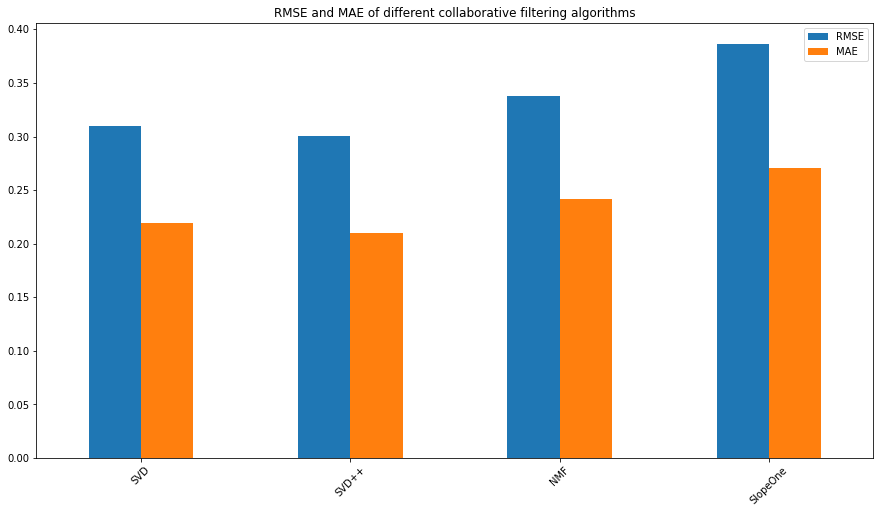

In [289]:
svd = cross_validate(SVD(), data, cv=5, n_jobs=-1, verbose=False)

svdpp = cross_validate(SVDpp(), data, cv=5, n_jobs=-1, verbose=False)

nmf = cross_validate(NMF(), data, cv=5, n_jobs=-1, verbose=False)

slope = cross_validate(SlopeOne(), data, cv=5, n_jobs=-1, verbose=False)


df_results = pd.DataFrame(columns=['Method', 'RMSE', 'MAE'])

df_results.loc[len(df_results)]=['SVD', round(svd['test_rmse'].mean(),5),round(svd['test_mae'].mean(),5)]

df_results.loc[len(df_results)]=['SVD++', round(svdpp['test_rmse'].mean(),5),round(svdpp['test_mae'].mean(),5)]

df_results.loc[len(df_results)]=['NMF', round(nmf['test_rmse'].mean(),5),round(nmf['test_mae'].mean(),5)]

df_results.loc[len(df_results)]=['SlopeOne', round(slope['test_rmse'].mean(),5),round(slope['test_mae'].mean(),5)]

display(df_results)


ax = df_results[['RMSE','MAE']].plot(kind='bar', figsize=(15,8))

ax.set_xticklabels(df_results['Method'].values)

ax.set_title('RMSE and MAE of different collaborative filtering algorithms')

plt.xticks(rotation=45)

matplotlib.rcParams.update({'font.size': 14})

plt.show();

#**Conclusions**